# Objective
The objective of this notebook is:

## Jumpman23 - Exploratory Data Analysis
We will be using the provided Jumpman23 dataset.

# Summary
1. [Understand the data](#understand)\
    1.1 [N/A's?](#na)\
2. 
3.
4. 
5.
6. [Scratch](#scratch)

### Understanding the Delivery Process

A;lkasjdf;lkajsdf;ljasdlfkjal;sdfkja

;laksdfj;lkajdsf;lkjasdl;fkjasdf

asdf;lkjasd;flkjas;dlfkja;lsdkjf

### Understanding Delivery Attributes

- **Job_ID:**  a unique identifier of a delivery
- **Customer_id:** a unique identifier for the Jumpman23 customer
- **Jumpman_id:**  a unique identifier for the Jumpman who completed the delivery
- **vehicle_type:** The method of transport the Jumpman used to complete the delivery
- **pickup_place:** The name of the Pickup location
- **place_category:** A categorization of the Pickup location
- **Item_name:** the name of the item requested
- **Item_quantity:** how many of that item was requested
- **Item_category_name:** categorization provided by the merchant, think “appetizers”, “soups” etc
- **How_long_it_took_to_order:** how long it took to place the order [interval]
- **pickup_lat:** the coordinates of the pickup location
- **pickup_lon:** the coordinates of the pickup location
- **dropoff_lat:** the coordinations of the dropoff location
- **dropoff_lon:** the coordinations of the dropoff location
- **when_the_delivery_started:** localized timestamp representing when the delivery began
- **when_the_Jumpman_arrived_at_pickup:** localized timestamp representing when the Jumpman arrived at the pickup location
- **when_the_Jumpman_left_pickup:** localized timestamp representing when the Jumpman left the pickup location
- **when_the_Jumpman_arrived_at_dropoff :** localized timestamp representing when the Jumpman reached the customer

## Import Neccesary Dependencies

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from collections import Counter
import haversine as hs
import os as os
%matplotlib inline

In [88]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
os.listdir('..')

['Jumpman23', '.DS_Store', 'PM_MarketAnalysis', 'Jumpman23_2.zip', 'Solutions']

In [92]:
df = pd.read_csv('../Jumpman23/analyze_me.csv')

<a id='understand'></a>
## Understand the data

In [93]:
print(df.shape)
print(df.info())

(5983, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5

In [94]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


## Feature Engineering

Convert time columns into datetime

In [104]:
date_cols = ['when_the_delivery_started',
             'when_the_Jumpman_arrived_at_pickup',
             'when_the_Jumpman_left_pickup',
             'when_the_Jumpman_arrived_at_dropoff']

time_cols = ['how_long_it_took_to_order']
for i in date_cols:
    df[i] = pd.to_datetime(df[i])

Calculate the distance between the pickup and dropoff locations

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [105]:
subset_attributes = ['item_quantity','how_long_it_took_to_order']
#rs = round(red_wine[subset_attributes].describe(),2)
#ws = round(white_wine[subset_attributes].describe(),2)
#pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])
data1 = round(df[subset_attributes].describe(),2)

pd.DataFrame(data1)

,item_quantity
count,4753.00
mean,1.25
std,0.79
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,16.00


In [106]:
df['how_long_it_took_to_order'].describe()

count                           3038
unique                          2579
top       2020-10-04 00:03:20.155860
freq                               5
first     2020-10-04 00:01:22.997519
last      2020-10-04 01:13:13.266118
Name: how_long_it_took_to_order, dtype: object

In [101]:
df['item_quantity'].describe()

count    4753.000000
mean        1.248264
std         0.785904
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: item_quantity, dtype: float64

In [11]:
pd.DataFrame({'count':df.isnull().sum(), 
              'percent':(df.isnull().sum())/df.shape[0]}).sort_values(by='count', ascending=False)

,count,percent
how_long_it_took_to_order,2945,0.492228
item_name,1230,0.205582
item_quantity,1230,0.205582
item_category_name,1230,0.205582
place_category,883,0.147585
when_the_Jumpman_left_pickup,550,0.091927
when_the_Jumpman_arrived_at_pickup,550,0.091927
pickup_lon,0,0.000000
when_the_delivery_started,0,0.000000
dropoff_lon,0,0.000000


In [70]:
#what timeframe of data?

print(df.when_the_Jumpman_arrived_at_dropoff.min())
print(df.when_the_Jumpman_arrived_at_dropoff.max())

2014-10-01 00:30:21.109149
2014-10-30 23:29:44.866438


In [26]:
#what is the most popular method of delivery?
df['vehicle_type'].value_counts()

bicycle       4274
car           1215
walker         274
van             76
scooter         75
truck           48
motorcycle      21
Name: vehicle_type, dtype: int64

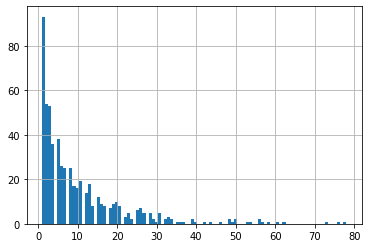

In [76]:
#distribution of jumpman delivery people
df.jumpman_id.value_counts().hist(bins=100)

In [81]:
df.jumpman_id.value_counts().sort_values(ascending=False)

99219     78
104533    76
142394    73
66416     62
61900     61
          ..
113041     1
167608     1
129229     1
161713     1
120726     1
Name: jumpman_id, Length: 578, dtype: int64

In [83]:
top_3 = ['99219','104533','142394']
df[df.jumpman_id.isin(top_3)]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,pickup_location,dropoff_location
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,NaN,NaN
21,1356218,128224,99219,bicycle,Osteria Morini,Italian,Garganelli,1.0,Pasta,NaN,40.721953,-73.997737,40.716720,-74.012300,2014-10-13 18:00:38.265026,2014-10-13 18:01:53.350477,2014-10-13 18:30:02.582698,2014-10-13 18:40:48.499622,NaN,NaN
24,1488027,396432,99219,bicycle,Juice Press,Juice Bar,Rehab Shot,2.0,Other Beverages,NaN,40.725948,-74.001106,40.718659,-74.002854,2014-10-30 17:36:13.679620,2014-10-30 17:36:59.326686,2014-10-30 17:55:48.869001,2014-10-30 18:05:27.272486,NaN,NaN
32,1467996,301380,142394,bicycle,ilili Restaurant,Middle Eastern,Hommus,1.0,Dips,00:05:16.988501,40.744188,-73.987531,40.734994,-73.987709,2014-10-27 13:18:37.395003,2014-10-27 13:30:46.385334,2014-10-27 13:46:07.104381,2014-10-27 13:57:18.114768,NaN,NaN
53,1407558,41130,99219,bicycle,Village Yogurt,NaN,NaN,NaN,NaN,NaN,40.737888,-73.996460,40.722746,-73.998857,2014-10-20 11:34:27.673232,2014-10-20 11:35:39.406833,2014-10-20 11:45:29.157896,2014-10-20 11:55:03.887998,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,1341499,67370,104533,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,40.733407,-73.986724,40.727516,-73.984562,2014-10-11 20:28:59.236913,2014-10-11 20:43:07.273090,2014-10-11 20:51:59.962551,2014-10-11 20:58:41.812364,NaN,NaN
5789,1341720,133202,99219,bicycle,Sushi Samba,Sushi,Yellowtail Tiradito,1.0,Sashimi Tiradito,00:06:28.169598,40.732666,-74.003293,40.745159,-73.995090,2014-10-11 20:51:21.406517,2014-10-11 20:58:29.946861,2014-10-11 21:12:20.194486,2014-10-11 21:23:04.219307,NaN,NaN
5802,1399659,373485,99219,bicycle,sweetgreen,Salad,Guacamole Greens,1.0,Signatures,00:09:40.029867,40.721323,-74.009732,40.729728,-74.004769,2014-10-19 16:20:53.468818,2014-10-19 16:25:32.377069,2014-10-19 16:57:22.303257,2014-10-19 17:06:06.192092,NaN,NaN
5903,1323353,318689,99219,bicycle,Olive Garden,Italian,Steak Gorgonzola-Alfredo,1.0,Carne,00:08:25.776758,40.759302,-73.984959,40.743218,-74.007343,2014-10-09 13:29:35.363760,2014-10-09 13:29:48.742303,2014-10-09 14:02:41.084932,2014-10-09 14:19:22.148722,NaN,NaN


In [84]:
df[df.how_long_it_took_to_order.isna()]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,pickup_location,dropoff_location
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,NaN,NaN
7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2.0,Cookies and Brownies,NaN,40.729791,-74.000589,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.666950,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521,NaN,NaN
8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,NaN,NaN,NaN,40.729357,-73.990156,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901,NaN,NaN
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278,NaN,NaN
12,1302973,344631,64396,bicycle,Mighty Quinn's BBQ,BBQ,Spare Ribs,1.0,Meats,NaN,40.727519,-73.988671,40.725486,-73.992819,2014-10-05 18:47:28.819056,2014-10-05 18:50:41.780487,2014-10-05 19:23:54.425485,2014-10-05 19:34:18.250581,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,1379770,243775,138061,car,Postmates Liquor Store,Shop,Raventos I Blanc L'Hereu Reserva Brut Cava - 2011,1.0,Sparkling,NaN,40.779598,-73.947388,40.723861,-73.996981,2014-10-17 13:08:33.103688,2014-10-17 13:22:28.449114,2014-10-17 13:26:53.968347,2014-10-17 13:57:58.413231,NaN,NaN
5976,1300266,135451,36664,bicycle,Juice Generation,Juice Bar,Red Dragon Fruit,1.0,Smoothies,NaN,40.777598,-73.979528,40.778493,-73.986542,2014-10-05 13:48:36.871896,2014-10-05 13:54:59.502837,2014-10-05 14:06:07.389917,2014-10-05 14:13:57.894695,NaN,NaN
5978,1360750,378035,151467,bicycle,Five Guys Burgers and Fries,Burger,Cheeseburger,1.0,Burgers,NaN,40.804404,-73.966430,40.818637,-73.939241,2014-10-14 13:30:25.567577,2014-10-14 13:41:09.428090,2014-10-14 13:53:28.264588,2014-10-14 14:10:19.256853,NaN,NaN
5979,1348697,96943,3296,bicycle,Cafe Mogador,Middle Eastern,Vegetarian,1.0,Cous Cous,NaN,40.727293,-73.984517,40.725938,-73.980550,2014-10-12 18:37:42.565897,2014-10-12 18:44:21.331886,2014-10-12 18:54:16.442017,2014-10-12 19:00:43.047785,NaN,NaN


In [30]:
df.groupby(by='pickup_place').count().sort_values(by='delivery_id', ascending=False)

,delivery_id,customer_id,jumpman_id,vehicle_type,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
pickup_place,,,,,,,,,,,,,,,,,
Shake Shack,311,311,311,311,311,310,310,310,0,311,311,311,311,311,289,289,311
Momofuku Milk Bar,186,186,186,186,186,185,185,185,0,186,186,186,186,186,179,179,186
The Meatball Shop,184,184,184,184,184,181,181,181,179,184,184,184,184,184,176,176,184
Blue Ribbon Sushi,151,151,151,151,151,149,149,149,147,151,151,151,151,151,127,127,151
sweetgreen,149,149,149,149,149,134,134,134,119,149,149,149,149,149,134,134,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New York Vintners,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1
New Malaysia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
New London Pharmacy,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1


In [35]:
len(df['pickup_place'].unique())

898

In [36]:
df[df['pickup_place']=='Shake Shack']

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1.0,Flat-Top Dogs,NaN,40.780826,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217
48,1320822,149508,43955,bicycle,Shake Shack,Burger,Cheese Fries,1.0,Fries,NaN,40.715279,-74.014860,40.716168,-74.003693,2014-10-08 21:18:11.900324,2014-10-08 21:28:15.142224,2014-10-08 21:47:35.029385,2014-10-08 21:54:36.734336
64,1414452,148033,128139,car,Shake Shack,Burger,NaN,NaN,NaN,NaN,40.682770,-73.976532,40.693256,-73.966173,2014-10-21 14:57:29.338613,2014-10-21 15:30:02.259968,2014-10-21 15:31:21.050095,2014-10-21 15:37:44.276996
137,1299559,148327,118093,scooter,Shake Shack,Burger,Fries,1.0,Fries,NaN,40.692146,-73.988865,40.701972,-73.987036,2014-10-05 12:30:23.27789,2014-10-05 13:07:23.30729,2014-10-05 13:26:13.134353,2014-10-05 13:35:38.318512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,1393083,58675,140096,bicycle,Shake Shack,Burger,Fries,2.0,Fries,NaN,40.715279,-74.014860,40.707930,-74.006463,2014-10-18 21:22:08.439224,2014-10-18 22:00:41.705364,2014-10-18 22:19:00.988894,2014-10-18 22:27:25.991452
5895,1300312,361651,44938,walker,Shake Shack,Burger,Shackburger,3.0,Burgers,NaN,40.758457,-73.989140,40.766912,-73.984086,2014-10-05 13:54:59.148422,2014-10-05 13:56:22.493833,2014-10-05 14:25:17.32414,2014-10-05 14:41:47.680372
5941,1389568,355090,158227,bicycle,Shake Shack,Burger,Cheese Fries,1.0,Fries,NaN,40.758457,-73.989140,40.761986,-73.985676,2014-10-18 15:50:57.637565,2014-10-18 15:55:54.50221,2014-10-18 16:20:14.411273,2014-10-18 16:25:49.844492
5962,1483811,180567,41408,car,Shake Shack,Burger,Shack -Cago Dog,1.0,Flat Top Dogs,NaN,40.715279,-74.014860,40.722574,-74.010246,2014-10-29 22:37:52.579546,2014-10-29 22:40:28.989659,2014-10-29 22:58:21.162858,2014-10-29 23:02:48.791177


<a id='scratch'></a>
## Scratch

In [ ]:
loc1=(df.iloc[2]['pickup_lat'],df.iloc[2]['pickup_lon'])
loc2=(df.iloc[2]['dropoff_lat'],df.iloc[2]['dropoff_lon'])
hs.haversine(loc1,loc2)